# Introduction
The dataset is from kaggle you can view it and understand columns from this link __[link text](https://www.kaggle.com/datasets/lava18/google-play-store-apps)__

# Questions
* What is the most Expensive app on the store?
* Which Genre has more apps?
* What is the average size of the free apps & paid apps?
* What is the 5 top expenisve apps that has rate of 5?
* How many apps that has more than 50K reviews?
* What is the average price of the apps for each genre with each installs numbers?
* How many apps have rating > 4.7 and what is thier average price?
* How much google earned from the 5,000,000+ installed apps?
* What is the max and min size for free and paid apps?
* Is there a Correlation between Rating, Reviews, Size with the price of the app?
* How many apps for each type for each content reading?
* How many apps that can work on android version 4?

# Imports

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':[7, 7]}, font_scale = 1.2)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Studies\\Data\\Datasets\\Google play store apps\\googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Distinguish the Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

**Fix Review Column**

In [4]:
# def fix_review(review):
#     try:
#         return float(review)
#     except:
#         return np.nan

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

**Fix Size Column**

In [5]:
def fix_size(size):
    try:
        if size.endswith('M'):
            return(float(size[:-1]))
        elif size.endswith('k'):
            return(float(size[:-1])/1024)
        elif size == '1,000+':
            return 1.0
        else:
            return(np.nan)
       
    except:
        return(np.nan)

df['Size'] = df['Size'].apply(fix_size)

**Fix Price Column**

In [6]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [7]:
df[df['Price'] == 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
def fix_price(price):
    try:
        if price.startswith('$'):
            return float(price[1:])
        else:
            return 0.0

    except:
        return np.nan
    
df['Price'] = df['Price'].apply(fix_price)

In [9]:
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


In [10]:
df[df['Rating'] == 19.000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.drop(10472, axis = 0, inplace=True)

In [12]:
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [13]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
df['Type'].value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

In [17]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [18]:
df['Android Ver'].unique().tolist()

['4.0.3 and up',
 '4.2 and up',
 '4.4 and up',
 '2.3 and up',
 '3.0 and up',
 '4.1 and up',
 '4.0 and up',
 '2.3.3 and up',
 'Varies with device',
 '2.2 and up',
 '5.0 and up',
 '6.0 and up',
 '1.6 and up',
 '1.5 and up',
 '2.1 and up',
 '7.0 and up',
 '5.1 and up',
 '4.3 and up',
 '4.0.3 - 7.1.1',
 '2.0 and up',
 '3.2 and up',
 '4.4W and up',
 '7.1 and up',
 '7.0 - 7.1.1',
 '8.0 and up',
 '5.0 - 8.0',
 '3.1 and up',
 '2.0.1 and up',
 '4.1 - 7.1.1',
 nan,
 '5.0 - 6.0',
 '1.0 and up',
 '2.2 - 7.1.1',
 '5.0 - 7.1.1']

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [21]:
df.drop(['Genres', 'Last Updated', 'Current Ver'], axis = 1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device


In [22]:
def Check_version_4(version):
    try:
        if version.startswith('4'):
            return 'yes'
        else:
            return 'no'
    except:
        return np.nan

df['Working_on_Version_4'] = df ['Android Ver'].apply(Check_version_4)
df.drop('Android Ver', axis = 1, inplace=True)

In [23]:
df.isnull().sum()

App                        0
Category                   0
Rating                  1474
Reviews                    0
Size                    1695
Installs                   0
Type                       1
Price                      0
Content Rating             0
Working_on_Version_4       2
dtype: int64

In [24]:
df['Working_on_Version_4'].fillna (df['Working_on_Version_4'].mode()[0], inplace=True)
df['Type'].fillna (df['Type'].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\1933163268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Working_on_Version_4'].fillna (df['Working_on_Version_4'].mode()[0], inplace=True)
C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\1933163268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

App                        0
Category                   0
Rating                  1474
Reviews                    0
Size                    1695
Installs                   0
Type                       0
Price                      0
Content Rating             0
Working_on_Version_4       0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df ['Rating'] = imputer.fit_transform(df [['Rating']])
df ['Size'] = imputer.fit_transform(df [['Size']])
df.isnull().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Working_on_Version_4    0
dtype: int64

<Axes: xlabel='Rating'>

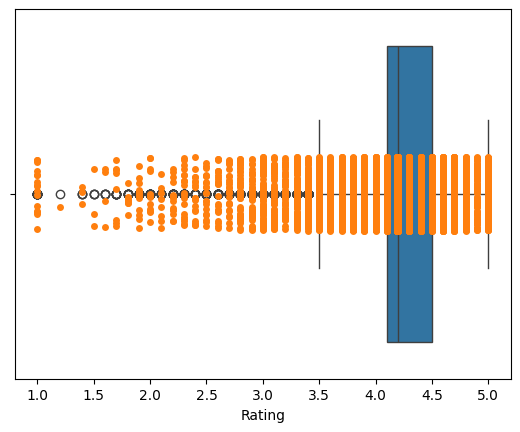

In [26]:
sns.boxplot(x='Rating', data=df)
sns.stripplot(x='Rating', data=df)

<Axes: xlabel='Reviews'>

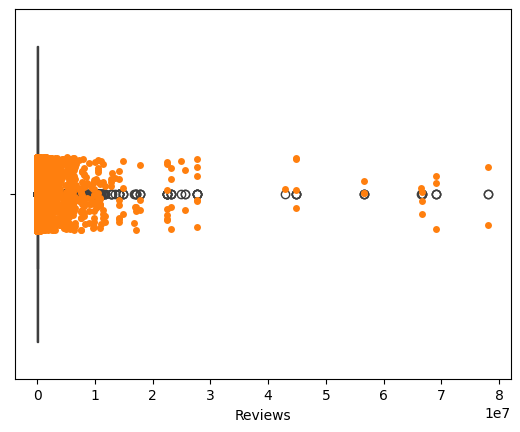

In [29]:
sns.boxplot(x='Reviews', data=df)
sns.stripplot(x='Reviews', data=df)

<Axes: xlabel='Size'>

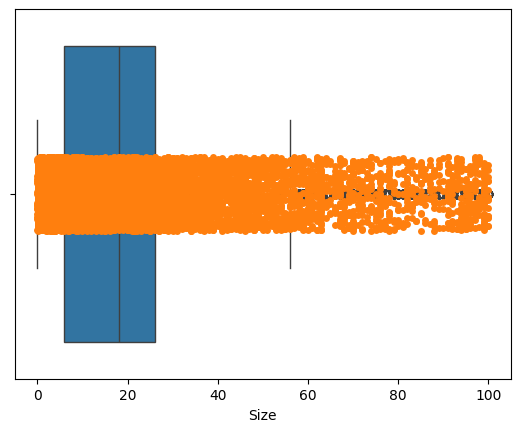

In [27]:
sns.boxplot(x='Size', data=df)
sns.stripplot(x='Size', data=df)

<Axes: xlabel='Price'>

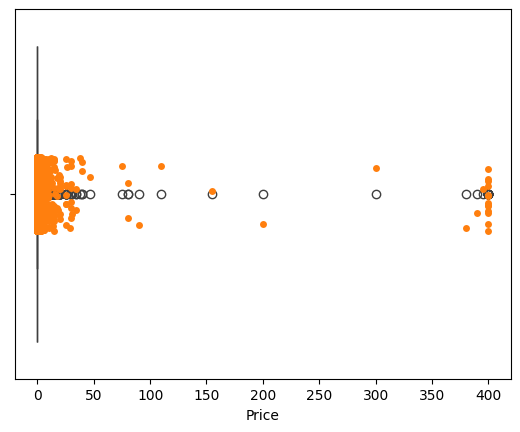

In [28]:
sns.boxplot(x='Price', data=df)
sns.stripplot(x='Price', data=df)

In [32]:
from datasist.structdata import detect_outliers

outliers_indices = detect_outliers(df, 0,['Rating', 'Reviews', 'Size', 'Price'])
outliers = df.loc[outliers_indices]
clean = df.drop(outliers_indices, axis = 0)

In [33]:
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55.0,2.700000,"5,000+",Free,0.00,Everyone,yes
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.200000,250.0,1.100000,"100,000+",Free,0.00,Everyone,yes
159,Cloud of Books,BOOKS_AND_REFERENCE,3.300000,1862.0,19.000000,"1,000,000+",Free,0.00,Everyone,yes
176,Free Book Reader,BOOKS_AND_REFERENCE,3.400000,1680.0,4.000000,"100,000+",Free,0.00,Everyone,yes
209,Plugin:AOT v5.0,BUSINESS,3.100000,4034.0,0.022461,"100,000+",Free,0.00,Everyone,no
...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.191757,17.0,0.153320,100+,Paid,0.99,Mature 17+,no
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.400000,35.0,2.400000,"1,000+",Paid,7.99,Everyone,yes
10782,Trine 2: Complete Story,GAME,3.800000,252.0,11.000000,"10,000+",Paid,16.99,Teen,no
10785,"sugar, sugar",FAMILY,4.200000,1405.0,9.500000,"10,000+",Paid,1.20,Everyone,no


In [34]:
clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,yes
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,yes
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167.0,5.600000,"50,000+",Free,0.0,Everyone,no
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.191757,0.0,9.600000,10+,Free,0.0,Everyone,yes
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,yes
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,yes
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,no


In [38]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,yes
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,yes
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,yes
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,yes
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,yes
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,yes
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,no
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,no


# What is the most expensive app on the store?

In [35]:
df['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [37]:
df[df['Price'] == df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,yes


# Which Genre has more apps?

In [39]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\1592072354.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, y='Category', palette='bright')


<Axes: xlabel='count', ylabel='Category'>

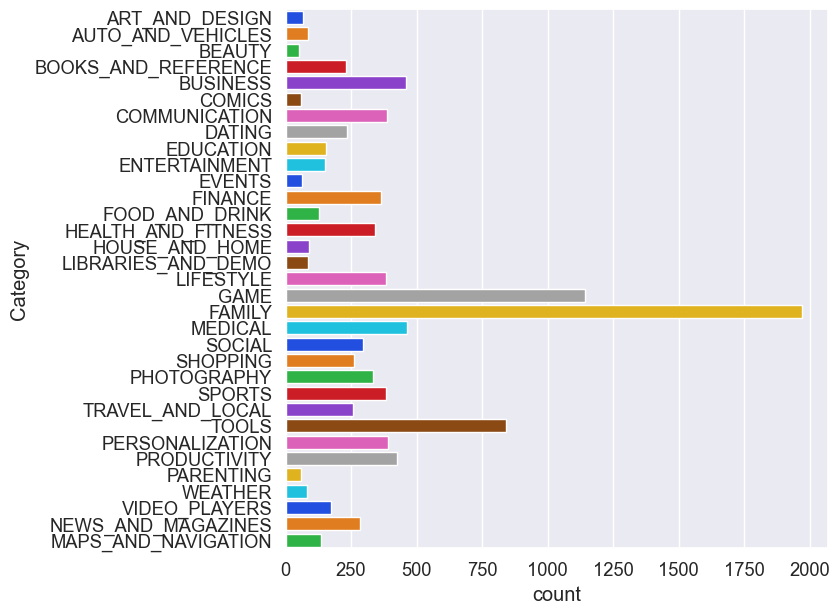

In [56]:
sns.countplot(data = df, y='Category', palette='bright')

# What is the average size of the free apps & paid apps?

In [45]:
free = df[df['Type'] == 'Free']
paid = df[df['Type'] == 'Paid']

In [47]:
free['Size'].mean()

21.675505095311244

In [48]:
paid['Size'].mean()

19.516452708586062

In [51]:
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,10040.0,21.675505,20.714101,0.008301,6.1,19.0,26.0,100.0
Paid,800.0,19.516453,21.077113,0.013672,3.4,13.0,25.0,100.0


C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\1149659265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Type', y='Size', estimator=np.mean, palette='bright')


<Axes: xlabel='Type', ylabel='Size'>

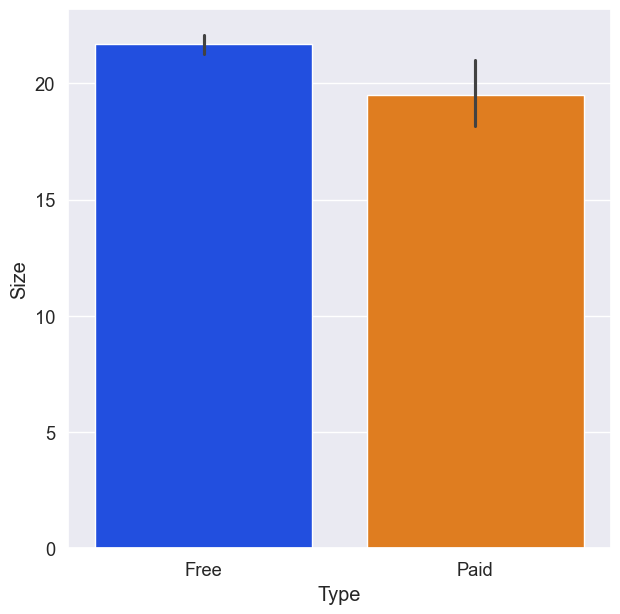

In [67]:
sns.barplot(data = df, x='Type', y='Size', estimator=np.mean, palette='bright')

# What is the 5 top expenisve apps that has rate of 5?

In [62]:
df[df['Rating'] == 5].sort_values(by='Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
5489,AP Art History Flashcards,FAMILY,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,yes
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,no
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,no
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,yes
5482,meStudying: AP English Lit,FAMILY,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,no


# How many apps that has more than 50K reviews?

In [65]:
df[ df['Reviews'] > 50000 ].sort_values(by='Reviews', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
2544,Facebook,SOCIAL,4.1,78158306.0,21.516165,"1,000,000,000+",Free,0.0,Teen,no
3943,Facebook,SOCIAL,4.1,78128208.0,21.516165,"1,000,000,000+",Free,0.0,Teen,no
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,no
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,no
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,no
...,...,...,...,...,...,...,...,...,...,...
3046,Fantasy Football,SPORTS,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,no
3098,Fantasy Football,SPORTS,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,no
8294,Bokeh (Background defocus),PHOTOGRAPHY,4.0,50109.0,21.516165,"10,000,000+",Free,0.0,Everyone,no
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060.0,98.000000,"1,000,000+",Free,0.0,Everyone,yes


# What is the average price of the apps for each genre with each installs numbers?

In [72]:
pd.pivot_table(data = df, index='Category', columns='Installs', values='Size', aggfunc=np.mean)

C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\2551430530.py:1: FutureWarning: The provided callable <function mean at 0x000002BCFC6B2200> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data = df, index='Category', columns='Installs', values='Size', aggfunc=np.mean)


Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,NaN,1.2,NaN,3.866667,25.500000,NaN,NaN,9.836364,23.606466,2.900000,...,NaN,NaN,7.740000,23.072055,NaN,10.783333,25.000000,NaN,13.683333,NaN
AUTO_AND_VEHICLES,NaN,NaN,0.864258,37.275000,24.504974,NaN,11.080000,13.236028,29.000000,14.666667,...,NaN,25.400000,11.900000,21.172055,17.000000,13.003233,NaN,31.666667,12.840000,NaN
BEAUTY,NaN,NaN,NaN,3.600000,23.268562,NaN,NaN,8.038462,21.516165,13.743233,...,NaN,NaN,12.200000,9.200000,6.000000,10.300000,NaN,3.700000,26.252694,NaN
BOOKS_AND_REFERENCE,NaN,NaN,17.000000,10.299796,19.494541,21.516165,13.042105,7.728000,19.619110,11.606752,...,21.516165,6.767411,19.951010,21.096466,21.733333,10.283333,NaN,9.872499,16.908735,NaN
BUSINESS,NaN,10.0,5.760000,11.337172,19.768315,NaN,12.490616,10.779298,22.701629,14.483880,...,27.333333,18.634231,14.605882,21.844622,14.928000,9.078906,19.670999,19.313043,18.151347,NaN
COMICS,NaN,NaN,NaN,37.000000,18.554041,NaN,NaN,9.118182,21.516165,4.100000,...,NaN,NaN,6.180000,19.887124,21.000000,14.204799,NaN,NaN,22.883233,NaN
COMMUNICATION,NaN,NaN,2.900000,9.446309,13.203329,21.516165,8.224352,14.094621,19.436307,10.626530,...,19.214999,6.900000,8.865569,20.443233,6.573398,4.561523,18.432932,6.686346,22.059148,22.303627
DATING,NaN,NaN,9.100000,10.129412,17.672885,NaN,10.690000,15.357352,19.098695,11.232504,...,NaN,3.500000,20.276923,32.792481,9.116667,14.660000,NaN,9.046154,18.353846,NaN
EDUCATION,NaN,NaN,NaN,53.500000,19.005343,NaN,NaN,7.931328,21.781416,NaN,...,21.516165,NaN,NaN,32.636227,NaN,15.119361,NaN,NaN,15.252309,NaN


# How many apps have rating > 4.7 and what is thier avg price?

In [75]:
df[ df['Rating'] > 4.7 ]['Price'].mean()

0.5018487394957983

# How much google earned from the 5,000,000+ installed apps?

In [81]:
df.groupby('Installs').sum()['Price']

Installs
0                    0.00
0+                1205.41
1+                 179.29
1,000+            2662.56
1,000,000+          68.76
1,000,000,000+       0.00
10+                447.76
10,000+           2462.80
10,000,000+         14.97
100+               837.76
100,000+           861.45
100,000,000+         0.00
5+                  71.38
5,000+            1437.96
5,000,000+           0.00
50+                109.72
50,000+            603.85
50,000,000+          0.00
500+               134.62
500,000+            38.38
500,000,000+         0.00
Name: Price, dtype: float64

In [82]:
df[ df['Installs'] == '5,000,000+' ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Working_on_Version_4
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,yes
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39.000000,"5,000,000+",Free,0.0,Everyone,yes
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,21.516165,"5,000,000+",Free,0.0,Everyone,no
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,21.516165,"5,000,000+",Free,0.0,Everyone,no
69,Used cars for sale - Trovit,AUTO_AND_VEHICLES,4.2,52530.0,7.000000,"5,000,000+",Free,0.0,Everyone,yes
...,...,...,...,...,...,...,...,...,...,...
10568,Crazy Freekick,SPORTS,3.9,47688.0,17.000000,"5,000,000+",Free,0.0,Everyone,no
10683,Hunting Safari 3D,SPORTS,4.2,36183.0,20.000000,"5,000,000+",Free,0.0,Teen,no
10714,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358.0,7.200000,"5,000,000+",Free,0.0,Mature 17+,yes
10731,FeaturePoints: Free Gift Cards,FAMILY,3.9,121321.0,46.000000,"5,000,000+",Free,0.0,Everyone,yes


In [83]:
df[ df['Installs'] == '5,000,000+' ]['Price'].sum()

0.0

# What is the max and min size for free and paid apps?

In [85]:
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,10040.0,21.675505,20.714101,0.008301,6.1,19.0,26.0,100.0
Paid,800.0,19.516453,21.077113,0.013672,3.4,13.0,25.0,100.0


C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\2702073280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='Type', y='Size', palette='bright')


<Axes: xlabel='Type', ylabel='Size'>

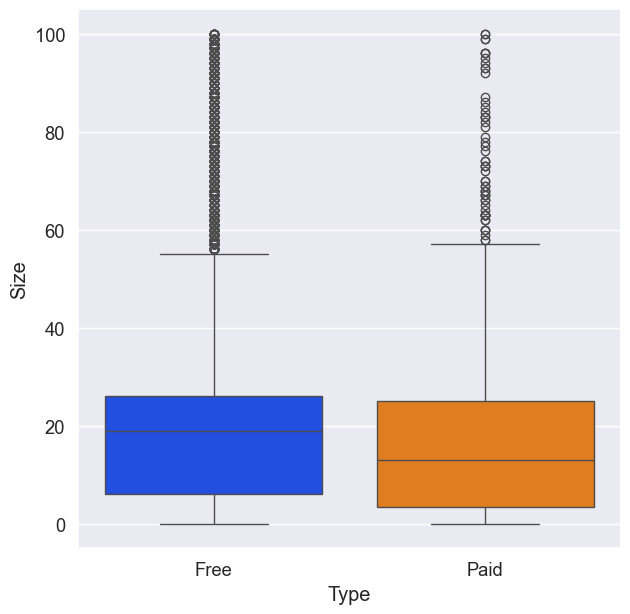

In [87]:
sns.boxplot(data = df, x='Type', y='Size', palette='bright')

# Is there a Correlation between Rating, Reviews, Size with the price of the app?

In [89]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Working_on_Version_4'],
      dtype='object')

In [93]:
x = df.drop(['App', 'Category', 'Installs', 'Type', 'Content Rating', 'Working_on_Version_4'], axis = 1).corr()['Price']
x

Rating    -0.020190
Reviews   -0.009667
Size      -0.022995
Price      1.000000
Name: Price, dtype: float64

<Axes: >

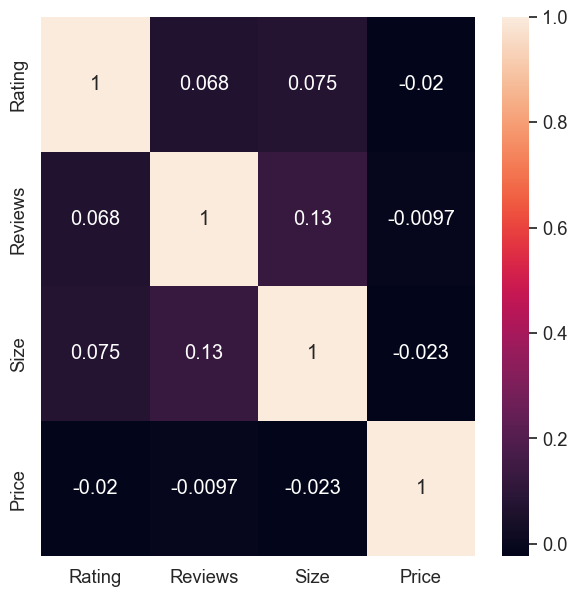

In [92]:
sns.heatmap(x, annot=True)

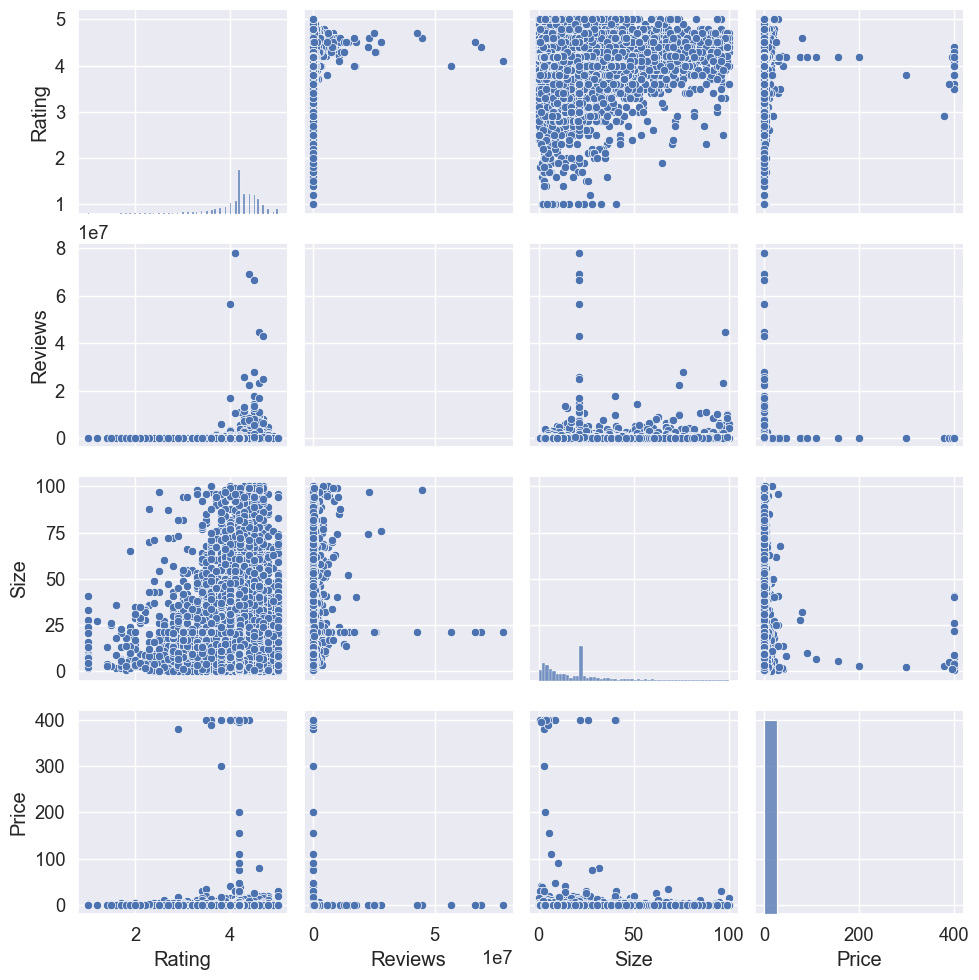

In [102]:
sns.pairplot(data = df)

# How many apps for each type for each content reading?

In [95]:
x = pd.pivot_table(data = df, index='Type', columns='Content Rating', values='Price', aggfunc='count')
x

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,8019.0,381.0,479.0,1156.0,2.0
Paid,NaN,695.0,33.0,20.0,52.0,NaN


<Axes: xlabel='Content Rating', ylabel='Type'>

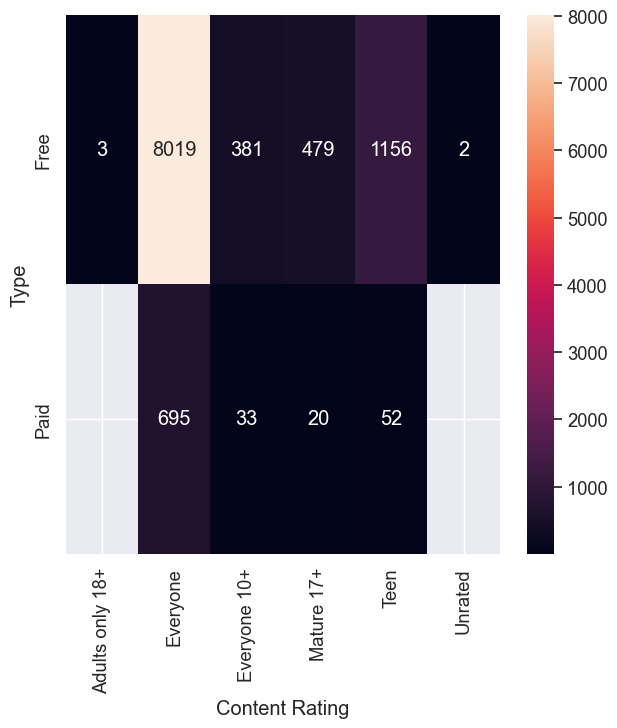

In [98]:
sns.heatmap(x, annot=True, fmt='0.0f')

# How many apps that can work on Android Version 4 ?

In [99]:
df['Working_on_Version_4'].value_counts()

Working_on_Version_4
yes    6961
no     3879
Name: count, dtype: int64

C:\Users\Mohamed Atef\AppData\Local\Temp\ipykernel_6352\4057502782.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='Working_on_Version_4', palette='bright')


<Axes: xlabel='Working_on_Version_4', ylabel='count'>

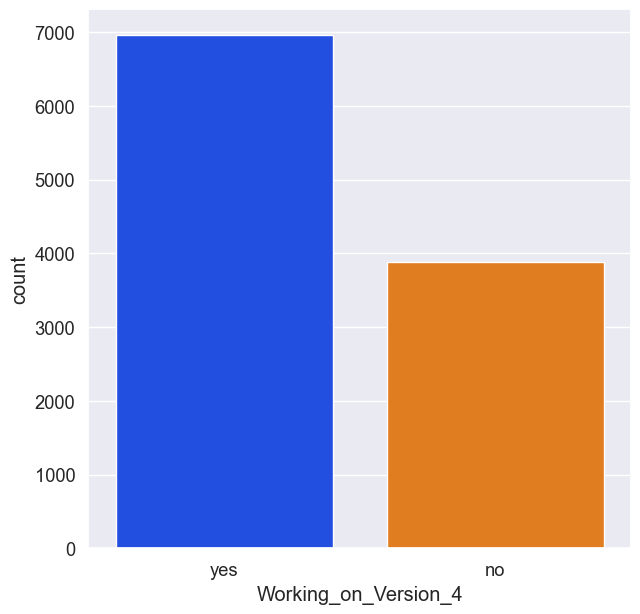

In [101]:
sns.countplot(data = df, x='Working_on_Version_4', palette='bright')